We will conduct a sentiment analysis on the hashtag "#RIPtwitter"

1)In order to be able to do this we will need the following libraries:
Re →  for cleaning the tweets
NLTK →  for removing stop words
Numpy →  for processing image
Pandas →  for handling extracted data
Textblob →  for sentiment analysis
Wordcloud →  for plotting word cloud
Tweepy →  for Twitter API authorization and extracting tweets from it
Matplotlib →  for visualization.

In [1]:
!pip install re 
!pip install  nltk
!pip install  tweepy
!pip install  numpy 
!pip install  pandas 
!pip install  textblob 
!pip install  matplotlib
!pip install  wordcloud 

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


2)Import the previous installed libraries

In [1]:
import re
import nltk
import tweepy
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

3)Making use of Twitter API

In [2]:
TWITTER_API_KEY = "8r4bvIuCRsNzrbdPsCqaUoVv9"
TWITTER_API_SECRET = "JptZjnN991736aSssz4F8RUaOPtTHEOejNyDGb064KAjPJ2GMU"
TWITTER_ACCESS_TOKEN = "1297797286148399104-JTeBfDEIMD5xDmuzgtmiOcJMrurhFx"
TWITTER_ACCESS_SECRET = "FmJFEJjFiJEMMRAHenXe1dCNpPD6lz02mKuZVMzBP9b7c"

#Authentificate with Twitter
auth = tweepy.OAuthHandler(TWITTER_API_KEY, TWITTER_API_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_SECRET)
 
#Create the API object
api = tweepy.API(auth, wait_on_rate_limit=True)

4)Access the tweets that have #RIPtwitter

In [3]:
hashtag = '#RIPtwitter -filter:retweets'  
results = tweepy.Cursor(api.search_tweets, q=hashtag, lang='en', tweet_mode='extended').items(2000)
  
# add the tweets in a dataframe
all_tweets = [tweet.full_text for tweet in results]
df = pd.DataFrame(all_tweets, columns=['Tweets'])  


In [4]:
# see the optained tweets
df.shape
(100,1)
pd.set_option("display.max_colwidth", -1) 
df.sample(10)

C:\Users\andre\AppData\Local\Temp/ipykernel_17172/3704336807.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,Tweets
1965,"Careful, Because it's 42! #RIPTwitter"
1760,"Hey, The number is 45! #RIPTwitter"
1383,"Should the worst happen, the first two words on Twitter's article on Wikipedia are about to be changed from ""Twitter was"" to ""Twitter is.""\n#RIPTwitter"
426,"&gt; Thu, 01 Dec 2022 04:00:01 [57.8F @ delta -0.3F and #RIPTwitter]"
343,"&gt; Thu, 01 Dec 2022 14:00:03 [58.5F @ delta 0.2F and #RIPTwitter]"
318,"Hey, The number is 33! #RIPTwitter"
1978,@elonmusk Nope. Slow and buggy as 💩\n#RIPTwitter
886,"Careful, Because it's 99! #RIPTwitter"
594,Another #Fail for the #RIPTwitter files - \n@ElonMusk Might Need a Refresher on His Own @Twitter Policies | @VanityFair https://t.co/3N98a9M1BT @cnn #parody
842,"Careful, Because it's 61! #RIPTwitter"


5)Cleaning the tweets. We will remove from the tweets using regex + re library any URL links, mentions or any elements in a tweet that are irrelevant ot this sentiment analysis

In [5]:
def clean_tweets(tweets):
  tweets = re.sub('@[A-Za-z0–9]+', '', tweets) # remove tag(@)
  tweets = re.sub('#', '', tweets) # remove hashtags(#)
  tweets = re.sub('RT[\s]+', '', tweets) # remove RT
  tweets = re.sub('https?:\/\/\S+', '', tweets) # remove URL links
  return tweets

In [6]:
df.Tweets = df.Tweets.apply(clean_tweets)

In [7]:
# See the results
pd.set_option("display.max_colwidth", -1) 
df.sample(10)

C:\Users\andre\AppData\Local\Temp/ipykernel_17172/2613969025.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,Tweets
863,"Careful, Because it's 2! RIPTwitter"
1698,"Careful, Because it's 66! RIPTwitter"
490,We are trialling Mastodon to replace Twitter. Its the cool new kid on the block. Find us there: \n\nRIPTwitter Melbourne Photographer
2,"Are you ready for the hype? Ready, Set... IT'S 21!!! RIPTwitter"
1970,‘RIPTwitter’ trends as users await site’s potential collapse
1930,"Exceptionally bad timing, guys.\n\nRIPTwitter \n"
768,Guess what... It's 84! RIPTwitter
1680,The number is.. 59! RIPTwitter
586,"I’ve Got 2 Floor tickets for Taylor swift Concert…\nDate: 24th March 2023 @ Allegaint Stadium - Las Vegas , NV, Dm if you are interested in getting them and I’m selling pretty cheap🙏🙏\nTicketmaster TheEraTour seatgeek\ntaylorswifttickets RIPTwitter"
1190,Wow......Fuck you very much elonmusk...Now Twitter is being killed exactly like Vine died years ago... RIPTwitter…


6)Calculating the subjectivity and polarity of tweets. The subjectivity is nothing but a sentence that expresses some personal feelings, views, or beliefs. Its values range from 0 to 1 where 0 is very objective and 1 is very subjective
while polarity means emotions expressed in a sentence. Its value ranges from -1 to 1, where -1 represents the most negative comment and 1 represent the most positive comment.

In [8]:
# Subjectivity
def subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
 
# Polarity
def pol(tweet):
    return TextBlob(tweet).sentiment.polarity
 
df['Subjectivity'] = df.Tweets.apply(subj)
df['Polarity'] = df.Tweets.apply(pol)

df.head(10)

,Tweets,Subjectivity,Polarity
0,You are not gonna believe it.. It's 31! RIPTwitter,0.000000,0.000000
1,"Are you ready for the hype? Ready, Set... IT'S 27!!! RIPTwitter",0.500000,0.295312
2,"Are you ready for the hype? Ready, Set... IT'S 21!!! RIPTwitter",0.500000,0.295312
3,RIPTwitter genshintwt anitwt leaked big sean link noah beck song album dating madison beer charli damelio cancelled dixie vinnie hacker eddie munson taylor swift emma chamberlain james charles drama addison rae ariana grande billie eilish elon musk,0.100000,0.000000
4,Guess what... It's 100 MAXIMUM NUMBER..! RIPTwitter,0.000000,0.000000
5,"Hey UNSAFE , are these the ""automated"" systems that ""automatically"" accept the false reports about my account being spam? That have done so for the past 3 years? TwitterOFF RIPTwitter TwitterShutdown TwitterMigration StopHateForProfit\n\n",0.425000,-0.325000
6,Guess what... It's 54! RIPTwitter,0.000000,0.000000
7,OH MY GOD IT'S 19! RIPTwitter,0.000000,0.000000
8,I find it so funny that there were so many people on here a few weeks ago with their hashtag RIPTwitter that are still here 😂😂😂,0.533333,0.183333
9,"Are you ready for the hype? Ready, Set... IT'S 9!!! RIPTwitter",0.500000,0.295312


7)Classify each tweets into different sentiment class which are Positive, Negative and Neutral.

In [9]:
# Sentiment (polarity)
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
 
df['Sentiment'] = df.Polarity.apply(sentiment)
df.head()

,Tweets,Subjectivity,Polarity,Sentiment
0,You are not gonna believe it.. It's 31! RIPTwitter,0.0,0.000000,Netural
1,"Are you ready for the hype? Ready, Set... IT'S 27!!! RIPTwitter",0.5,0.295312,Positive
2,"Are you ready for the hype? Ready, Set... IT'S 21!!! RIPTwitter",0.5,0.295312,Positive
3,RIPTwitter genshintwt anitwt leaked big sean link noah beck song album dating madison beer charli damelio cancelled dixie vinnie hacker eddie munson taylor swift emma chamberlain james charles drama addison rae ariana grande billie eilish elon musk,0.1,0.000000,Netural
4,Guess what... It's 100 MAXIMUM NUMBER..! RIPTwitter,0.0,0.000000,Netural


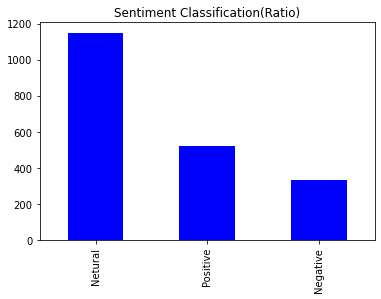

In [10]:
#The ratio of the sentiment
df.Sentiment.value_counts().plot(kind='bar', color='blue')
plt.title('Sentiment Classification(Ratio)')
plt.show()

Text(0, 0.5, 'Subjectivity')

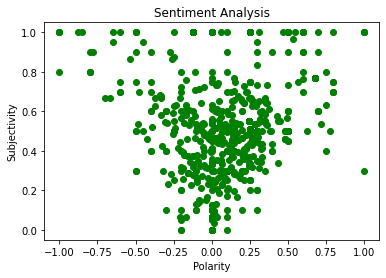

In [11]:
#Subjectivity vs Polarity in a scatter plot
plt.scatter(df.Polarity, df.Subjectivity, color='green')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [12]:
# The percentage of each class: Negative, Positive, Neutral
 
df_sentiment = pd.DataFrame(df.Sentiment.value_counts(normalize=True)*100)
df_sentiment['Total'] = df.Sentiment.value_counts()
df_sentiment

,Sentiment,Total
Netural,57.45,1149
Positive,25.95,519
Negative,16.60,332


7)The mosst used word in the tweets that have #RIPtwitter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


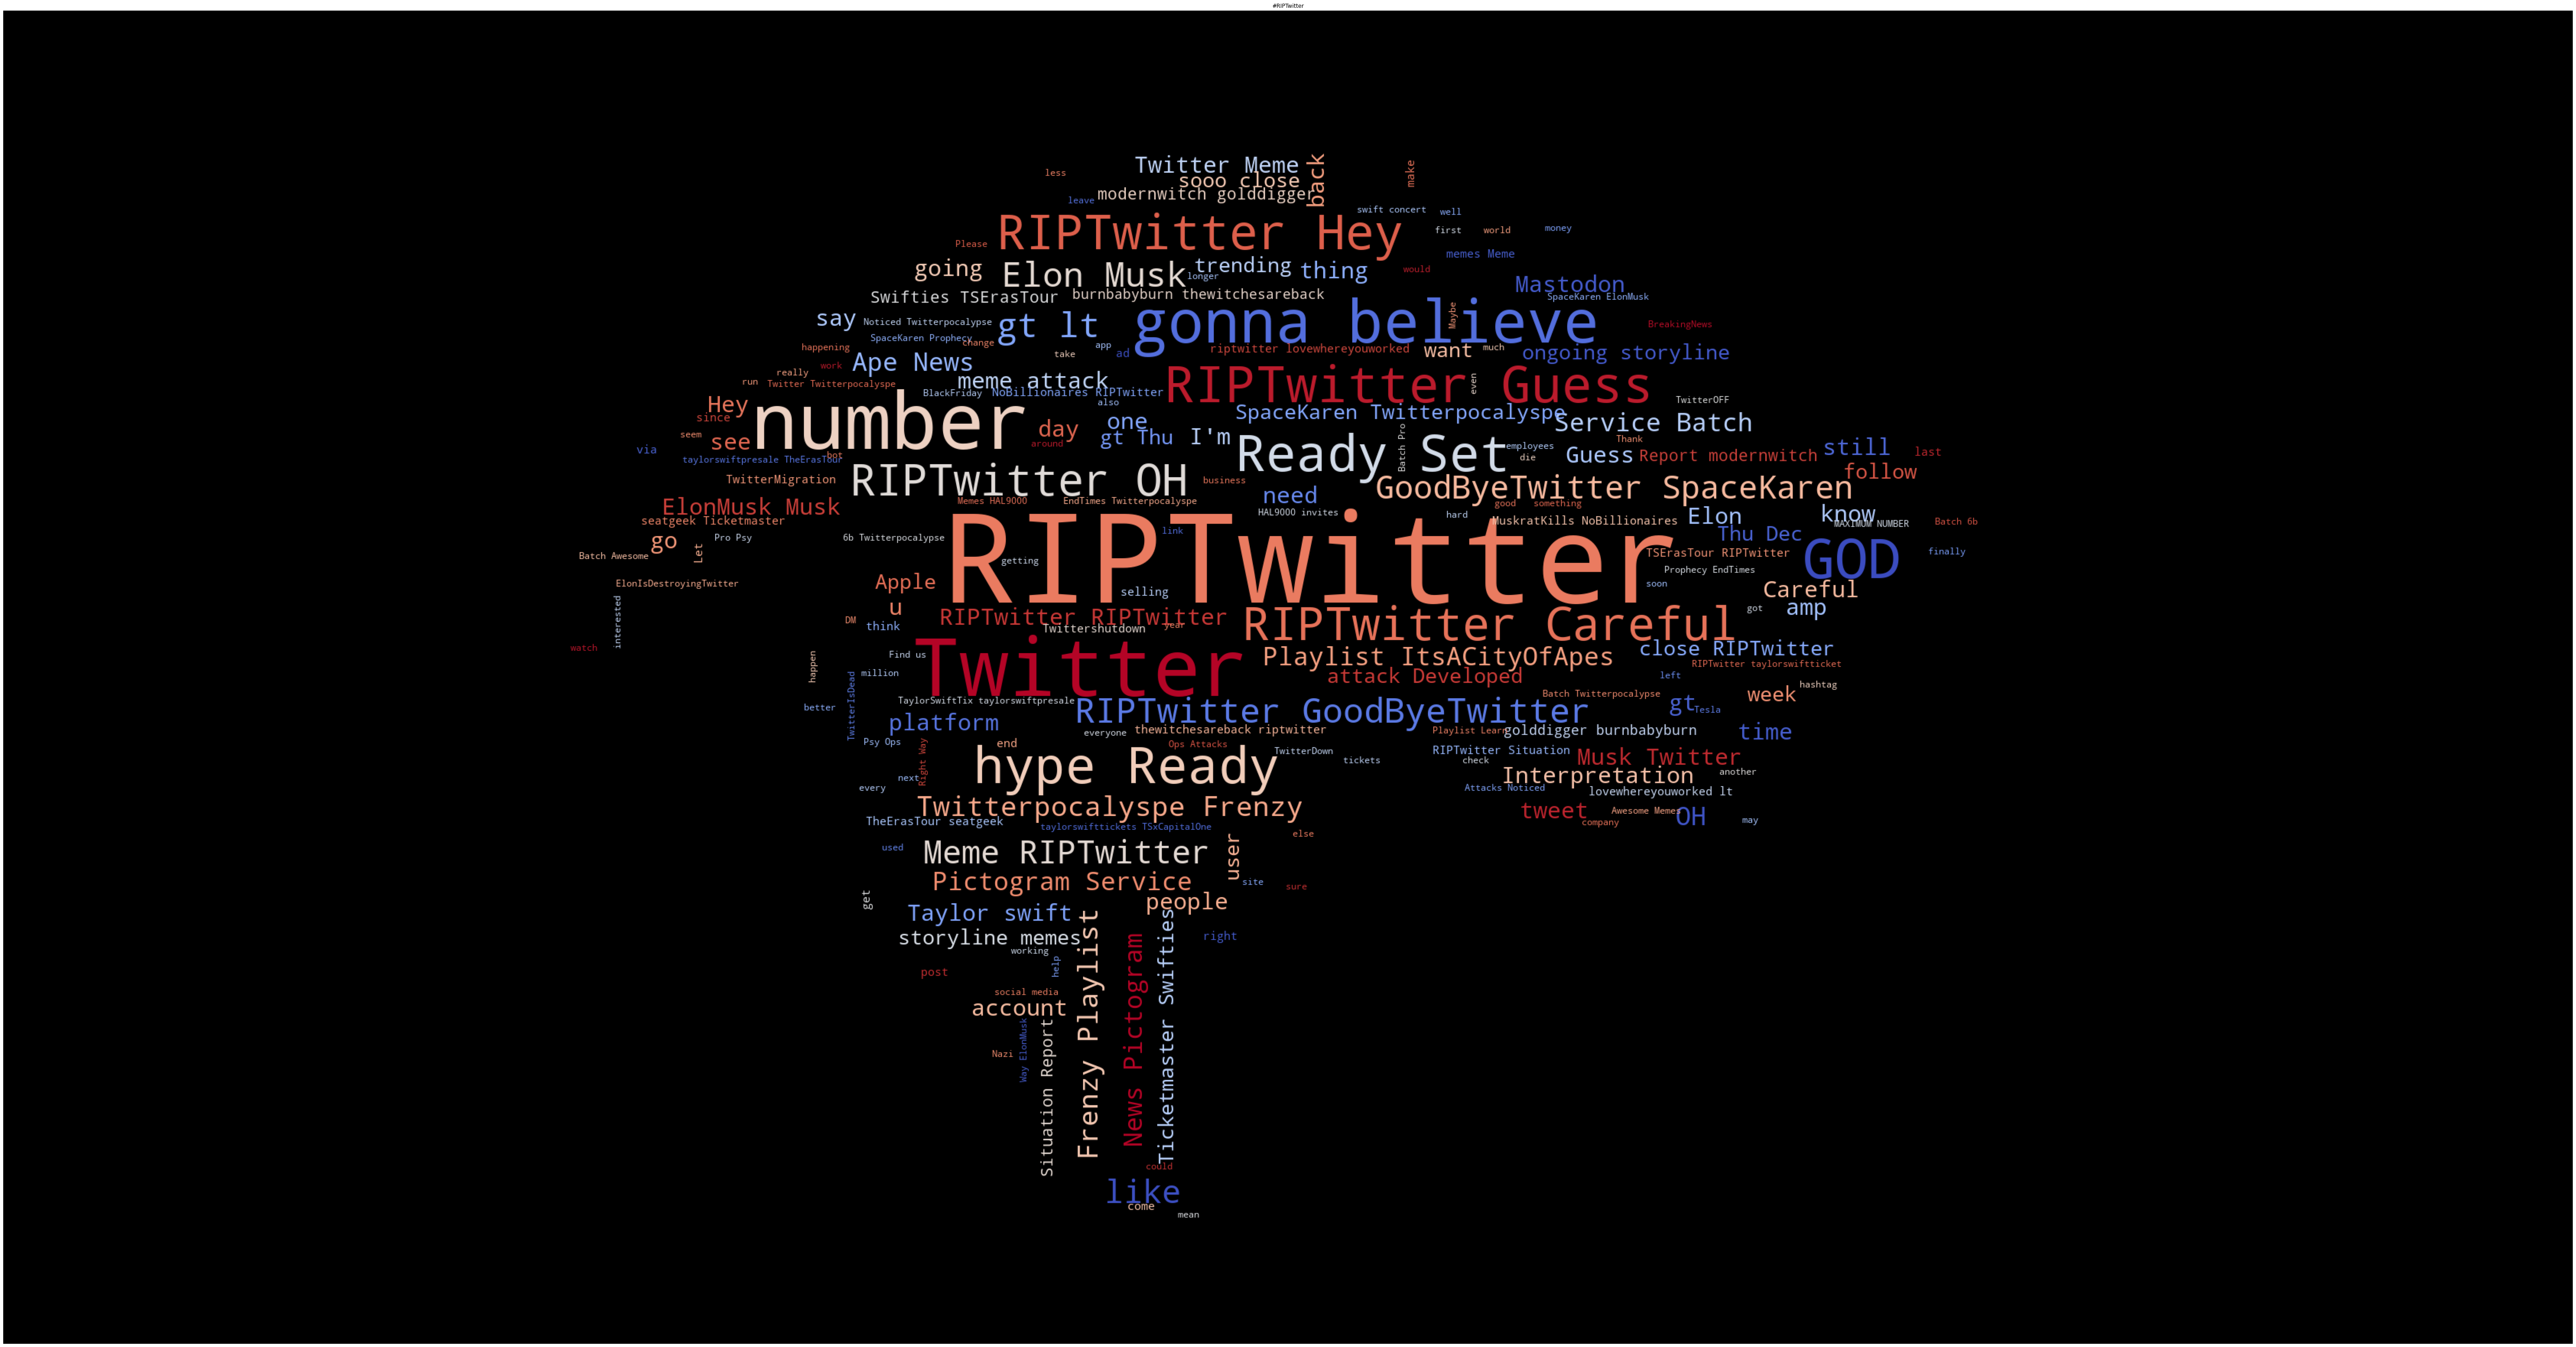

In [20]:
import cv2

# Stop Words 
nltk.download('stopwords')
stpwrd = set(nltk.corpus.stopwords.words('english'))
 
# Combining tweets by their text
allWords = ' '.join([twts for twts in df['Tweets']])
image = cv2.imread("mask.png") 
ripTwitter = image
def Word_cloud_image(data, title, mask=None):
    WordCloudImage = WordCloud(scale=3,random_state=21,colormap='coolwarm_r',mask=mask,stopwords=stpwrd,collocations=True,).generate(data)
    plt.figure(figsize=(100,100))
    plt.imshow(WordCloudImage)
    plt.axis('off')
    plt.title(title)
    plt.show()
 
Word_cloud_image(allWords, '#RIPTwitter', mask=ripTwitter)